In [1]:
import cv2
import math
import numpy as np
import os
import matplotlib.pyplot as plt
import polarTransform
from PIL import Image, ImageDraw
from tqdm import tqdm
import glob

In [2]:
# Get the paths of every file given a parent directory
def get_all_files(path):
    vect = []
    for path, subdirs, files in os.walk(path):
        for name in files:
            if (name == '.DS_Store') | (name=='Readme.txt'):
                pass
            else:
                vect.append(os.path.join(path, name))
        vect = sorted(vect)
    return vect

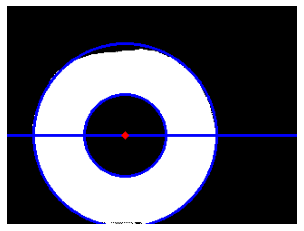

In [3]:
masks_DL = get_all_files('../new datasets/masks_DL')
img = (cv2.imread(masks_DL[0], cv2.IMREAD_GRAYSCALE)*255.0).astype(np.uint8)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,4,20, param1=10,param2=100,minRadius=0,maxRadius=60)
circles = np.uint16(np.around(circles))

i = circles[0,:][0]

line = img[i[1],:]
deltaR = np.sum(line==255)/2

# draw the outer circle
cv2.circle(cimg,(i[0],i[1]),i[2],(0,0,255),2)
# draw the center of the circle
cv2.line(cimg, (0,i[1]), (cimg.shape[1],i[1]), (0,0,255),2)
cv2.circle(cimg,(i[0],i[1]),2,(255,0,0),3)
cv2.circle(cimg,(i[0],i[1]),int(deltaR)+i[2],(0,0,255),2)

plt.axis('off')
plt.imshow(cimg)

In [4]:
from create_polar_im_DL_mask import create_polar_im_DL
# Saving the images
save_folder_masks = '../new datasets/masks_DL_polar'
DL_masks = get_all_files('../new datasets/masks_DL')
images = get_all_files('../dataset/images')

if not os.path.exists(save_folder_masks):
    os.mkdir(save_folder_masks)
    numb = ["{0:03}".format(i) for i in range(1,225)]
    for i in numb:
        os.mkdir(os.path.join(save_folder_masks,i))
            
for i in tqdm(range(len(images))):
    create_polar_im_DL(DL_masks[i],images[i],save_folder_masks)

100%|██████████| 2240/2240 [00:16<00:00, 133.98it/s]


In [9]:
path_polar = '../new datasets/masks_DL_polar'
polar_list = get_all_files(path_polar)

# Reshaping all the polar images to the same shape
y_coords = []
y_coords_resized = []
for i in get_all_files(path_polar_im):
    im = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    y_coords.append(im.shape[0])
print([np.min(y_coords), np.mean(y_coords), np.max(y_coords)])

[48, 99.0813898143741, 145]


In [10]:
# Saving the resized polar images
save_folder_polar_mean = '../new datasets/masks_DL_polar_mean'

if not os.path.exists(save_folder_polar_mean):
    os.mkdir(save_folder_polar_mean)
    numb = ["{0:03}".format(i) for i in range(1,225)]
    for i in numb:
        os.mkdir(os.path.join(save_folder_polar_mean,i))

def np_to_PIL(im):
    im = (im-np.min(im))/(np.max(im)-np.min(im))*255.0
    im = Image.fromarray(np.uint8(im))
    return im

for i in tqdm(polar_list):
    im = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    resized_mean = np_to_PIL(cv2.resize(im, (360,int(np.mean(y_coords))), interpolation=cv2.INTER_NEAREST_EXACT))
    save_path = os.path.basename(os.path.dirname(i)) + '/' + os.path.basename(i)[:-4]
    resized_mean.save(os.path.join(save_folder_polar_mean,save_path)+'.png')

100%|██████████| 2101/2101 [00:04<00:00, 433.35it/s]
